### Exercise 2

# Task 1: Installation and Loading of the spatstat Package and Loading of Data


In [1]:
library(spatstat)
data(murchison)

# Display basic information about the data
head(murchison)
print(murchison)
summary(murchison)

Ładowanie wymaganego pakietu: spatstat.data

Ładowanie wymaganego pakietu: spatstat.univar

spatstat.univar 3.1-1

Ładowanie wymaganego pakietu: spatstat.geom

spatstat.geom 3.3-4

Ładowanie wymaganego pakietu: spatstat.random

spatstat.random 3.3-2

Ładowanie wymaganego pakietu: spatstat.explore

Ładowanie wymaganego pakietu: nlme

spatstat.explore 3.3-3

Ładowanie wymaganego pakietu: spatstat.model

Ładowanie wymaganego pakietu: rpart

spatstat.model 3.3-3

Ładowanie wymaganego pakietu: spatstat.linnet

spatstat.linnet 3.2-3


spatstat 3.3-0 
For an introduction to spatstat, type 'beginner' 




List of spatial objects

gold:
Planar point pattern: 255 points
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

faults:
planar line segment pattern: 3252 line segments
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

greenstone:
window: polygonal boundary
enclosing rectangle: [352782.9, 681699.6] x [6706467, 7100804] metres

List of spatial objects

gold:
Planar point pattern: 255 points
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

faults:
planar line segment pattern: 3252 line segments
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

greenstone:
window: polygonal boundary
enclosing rectangle: [352782.9, 681699.6] x [6706467, 7100804] metres


Summary of 3 spatial objects

gold:
Planar point pattern:  255 points
Average intensity 1.924569e-09 points per square metre

Coordinates are given to 1 decimal place
i.e. rounded to the nearest multiple of 0.1 metres

Window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres
                    (329800 x 401700 metres)
Window area = 1.32497e+11 square metres
Unit of length: 1 metre

faults:
3252 line segments
Lengths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   690.4   952.1  1046.5  1314.1  4550.0 
Total length: 3403260.86567024 metres  
Length per unit area: 2.56855298198195e-05 
Angles (radians):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9292  1.3850  1.4347  1.8952  3.1408 
Window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres
                    (329800 x 401700 metres)
Window area = 1.32497e+11 square metres
Unit of length: 1 metre

greenstone:
Window: polygonal boundary
133 separate polygons (18 holes)
                 

# Task 2: Checking the class of objects and visualizing the data
Display a map with: locations of gold deposits, the position of faults, and the occurrence
of greenstone outcrops.


[1] "ppp"

[1] "psp"  "list"

[1] "owin"

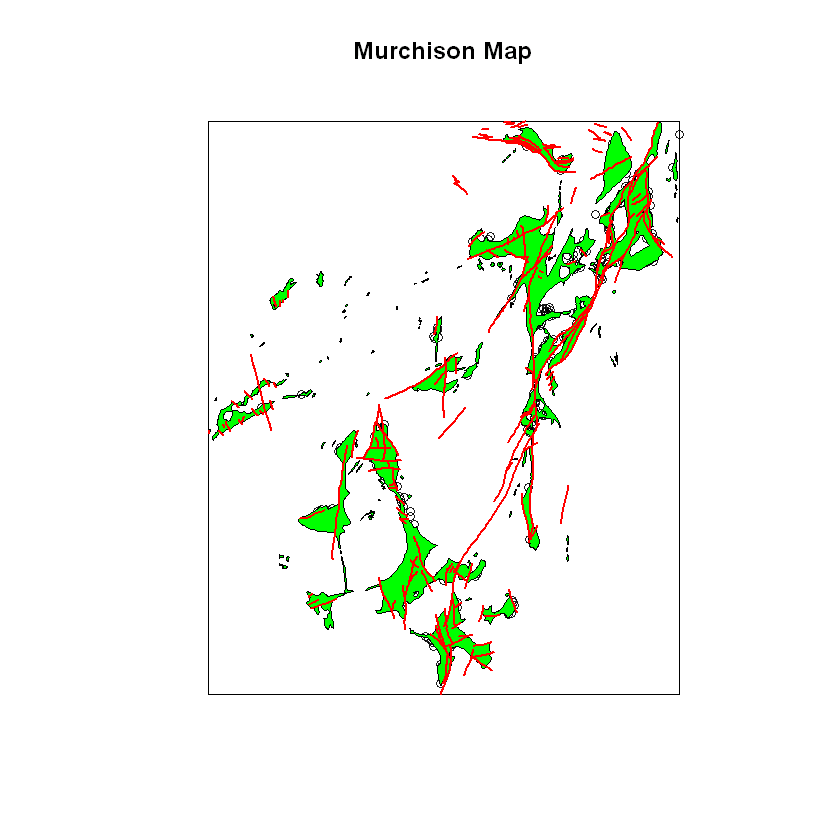

In [2]:

# Checking the class of the "gold" object (points - ppp class)
class(murchison$gold)

# Checking the class of the "faults" object (lines - psp class)
class(murchison$faults)

# Checking the class of the "greenstone" object (polygons - owin class)
class(murchison$greenstone)

# Visualizing the data on a map
# Plotting points (gold deposits)
plot(murchison$gold, main = "Murchison Map")

# Adding polygons (greenstone areas)
plot(murchison$greenstone, add = TRUE, col = "green")

# Adding lines (faults)
plot(murchison$faults, add = TRUE, col = "red", lwd = 2)


# Task 3: Calculating the intensity of gold deposits
For gold deposits, calculate the estimator λ
using the summary() function.


In [3]:

# Summary statistics for the points
lambda <- summary(murchison$gold)

# Extracting the intensity value
lambda <- lambda$intensity

# Displaying the intensity
print(lambda)


[1] 1.924569e-09


# Task 4: Grid of squares on the gold deposits map
Display the map of gold deposits distribution. Perform counting of points in squares
by dividing the area into a 5x5 grid. Intensity estimation is done by counting the points
in subareas. Show the result by overlaying it on the map of point distribution.


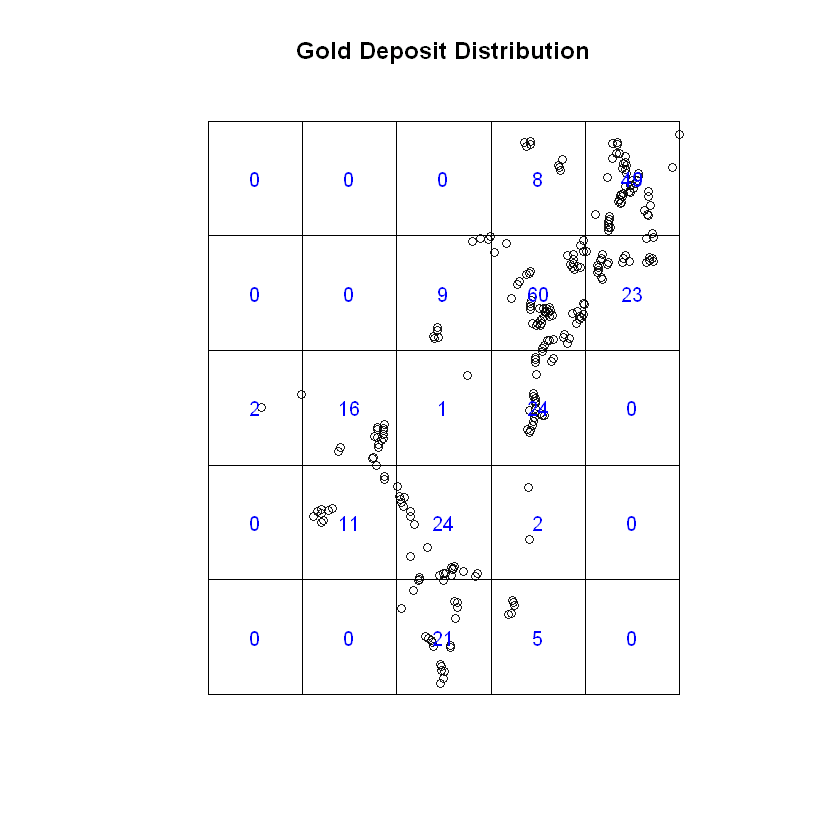

In [4]:

# Plotting the points
plot(murchison$gold, main = "Gold Deposit Distribution")

# Calculating the number of points in the 5x5 grid
pkt <- quadratcount(murchison$gold, nx = 5, ny = 5)

# Adding the grid to the plot
plot(pkt, add = TRUE, col = "blue")


# Task 5: Quadrat Test for Point Distribution
Perform a test of homogeneity for the point pattern distribution using the function quadrat.test().
Perform counting in a 5x5 grid.



	Chi-squared test of CSR using quadrat counts

data:  murchison$gold
X2 = 595.88, df = 24, p-value < 2.2e-16
alternative hypothesis: two.sided

Quadrats: 5 by 5 grid of tiles


[1] "Reject the null hypothesis, because p_value < 0.05. The points are not randomly distributed."

The p_value is: 3.446524e-110 . Therefore, we reject the null hypothesis (since p_value < 0.05) - the points are not randomly distributed.

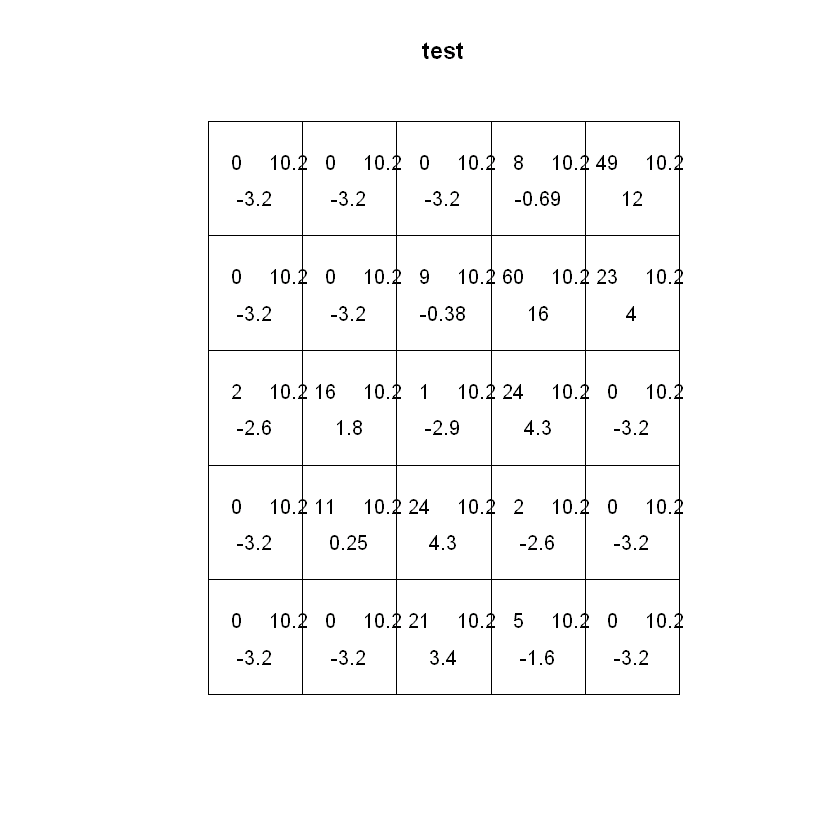

In [5]:

# Performing the quadrat test
test <- quadrat.test(murchison$gold, nx = 5, ny = 5)

# Displaying the test results
print(test)

# Extracting the p-value
p_value <- test$p.value

# Visualizing the test results
plot(test)

# Decision based on the p-value
ifelse(p_value < 0.05, 
       "Reject the null hypothesis, because p_value < 0.05. The points are not randomly distributed.",
       "Do not reject the null hypothesis - p_value > 0.05. The points are randomly distributed.")

# Displaying the interpretation of the result
cat("The p_value is:", p_value, ". Therefore, we reject the null hypothesis (since p_value < 0.05) - the points are not randomly distributed.")


# Task 6: Density Estimation for Gold Deposit Locations
Present a kernel density estimator for the locations of gold deposits using the density() function.


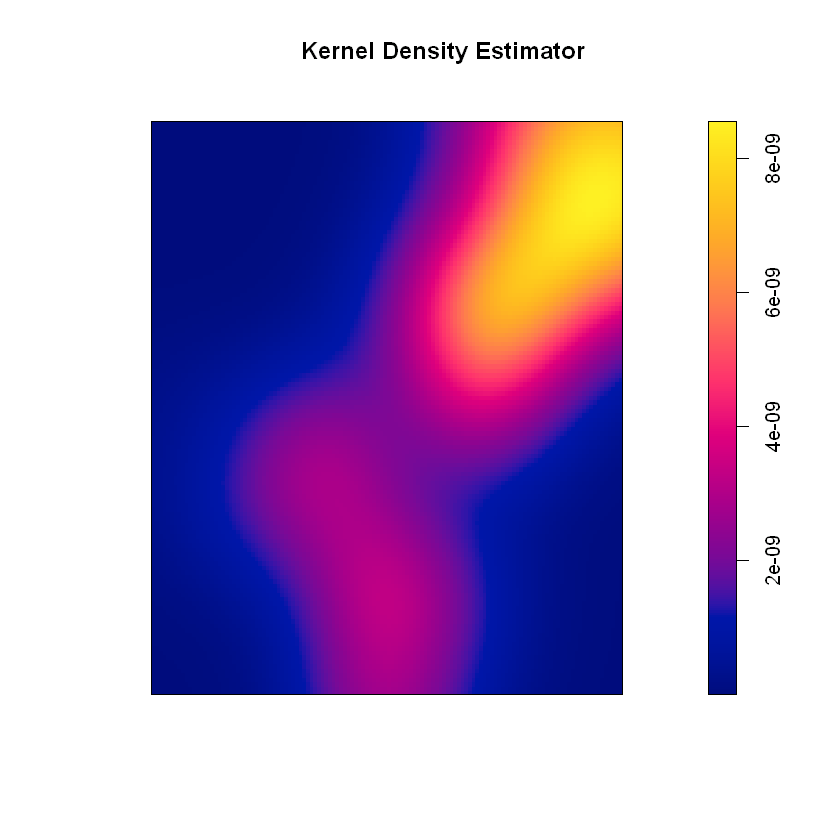

In [6]:

# Kernel density estimator for gold deposits
den <- density(murchison$gold)

# Plotting the density estimate
plot(den, main = "Kernel Density Estimator")


# Task 7: Contour and 3D Map


real-valued pixel image
128 x 128 pixel array (ny, nx)
enclosing rectangle: [352780, 682590] x [6699700, 7101500] metres


real-valued pixel image
128 x 128 pixel array (ny, nx)
enclosing rectangle: [352782.9, 682589.6] x [6699742, 7101484] metres
dimensions of each pixel: 2580 x 3138.609 metres
Image is defined on the full rectangular grid
Frame area = 132497203271.401 square metres
Pixel values
	range = [1.42788e-14, 8.555355e-09]
	integral = 265.3118
	mean = 2.002396e-09

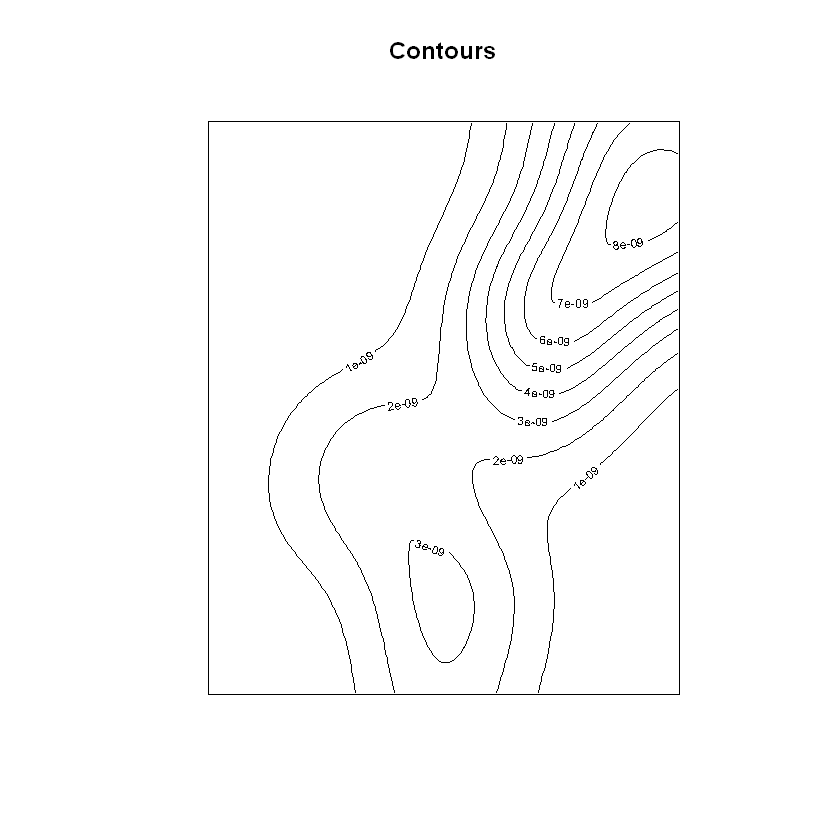

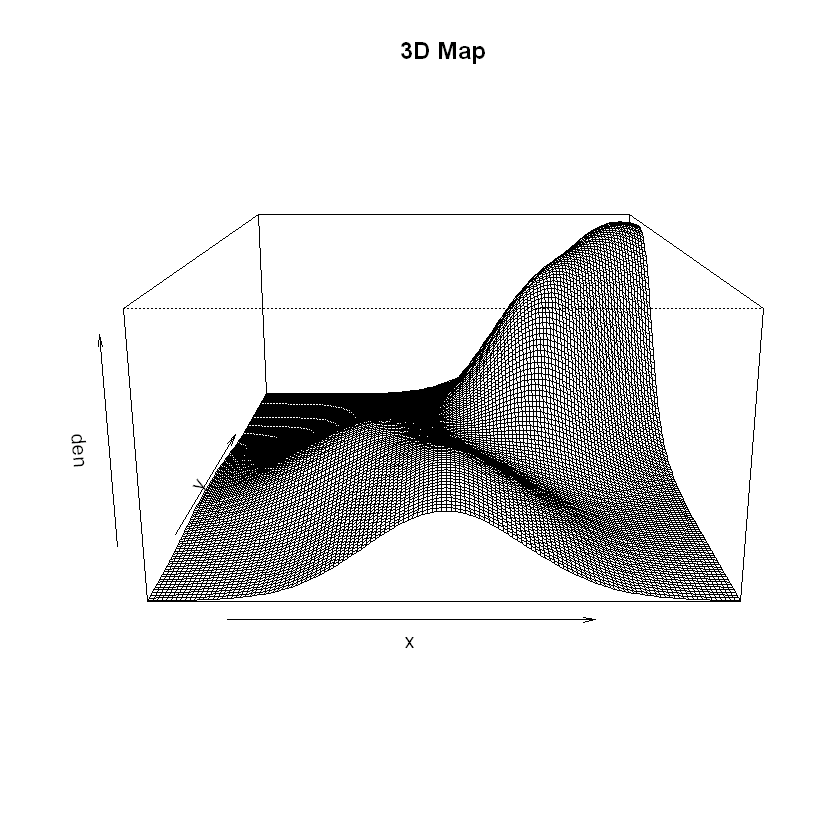

In [7]:
# Displaying the density object
print(den)

# Summary statistics for the density estimator
summary(den)

# Drawing contours based on density
contour(den, main = "Contours")

# Drawing a 3D map based on density
persp(den, main = "3D Map")
